# Scipy:

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [1]:
# fitting data to the periodic function

import numpy as np
from matplotlib import pyplot as plt
# curve_fit() function imported from scipy
from scipy.optimize import curve_fit

# produce an array representing the months in the year
months = np.arange(12)

# arrays for the maximum and minimum temperatures
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

# Defining the periodic function
def monthly_temps(x, a, b, c):
    return (a + b * np.cos((x + c) * 2 * np.pi / x.max()))

# curve_fit() function takes the monthly_temps function, months-data, temp-data
# and initial guess for the parameters as argument and returns
# the parameters a , b and c in param and the estimated covariance of parameters in cov
param_max, cov_max = curve_fit(monthly_temps, months, temp_max, [20, 10, 0])
param_min, cov_min = curve_fit(monthly_temps, months, temp_min, [-40, 20, 0])

print(param_max)
print(param_min)

[ 39.88861733 -10.59083157   1.33370155]
[25.55626462 -7.74472964  0.93101294]


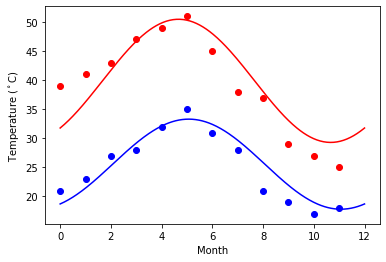

In [2]:
# plot the fit

days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, monthly_temps(days, *param_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, monthly_temps(days, *param_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

# Matplotlib:

This assignment is for visualization using matplotlib:

data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

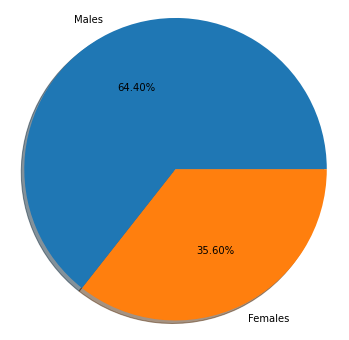

In [5]:
# Pie chart

labels = 'Males', 'Females'

fig1, ax1 = plt.subplots(figsize = (6,6))
ax1.pie(titanic['sex'].value_counts(), labels = labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

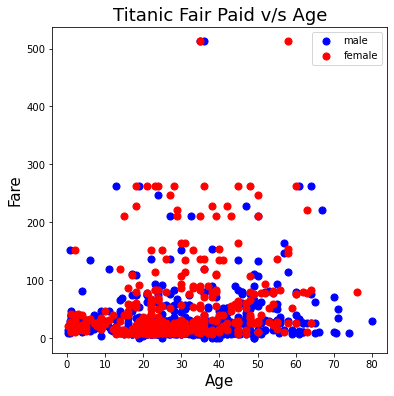

In [6]:
# Scatter plot

fig, ax = plt.subplots(figsize = (6,6))
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Fare', fontsize = 15)
ax.set_title('Titanic Fair Paid v/s Age', fontsize = 18)

for color, gender in [('b', 'male'), ('r', 'female')]:
    ax.scatter(titanic[titanic['sex']==gender]['age'], titanic[titanic['sex']==gender]['fare'],
               c=color, s=50)

ax.legend(['male', 'female'])
plt.show()